# Configuration
Environment variables for directory locations and enabling working in COLAB



In [1]:
# Parameters
ENABLE_COLAB = False

PROJECT_NAME = 'ML1030'

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_UTILITY_DIR = COLAB_ROOT_DIR + '/pipeline'

LOCAL_ROOT_DIR = '/home/magni/ML_Root/project_root'
LOCAL_UTILITY_DIR = LOCAL_ROOT_DIR + '/pipeline'

# TODO: Add in more utility directories to include in path
# TODO: Add in DATA_DIR

# Bootstrap Environment
<p>Initialize environment with the above configuration.<br>
Mount Google drive for access if needed<br>
Set currently active directory to PROJECT_DIR</p>

Sets variables:<br>
UTILITY_DIR = location of custom files for import<br>
PROJECT_DIR = location of project files (ipynb/py/...)<br>
ROOT_DIR = one level up from project_dir. <br>

#TODO Could probably use a graphic here to explain


In [2]:
import sys
import os

if ENABLE_COLAB:
  # Mount Google Drive for access
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  UTILITY_DIR = COLAB_UTILITY_DIR
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  UTILITY_DIR = LOCAL_UTILITY_DIR
  ROOT_DIR = LOCAL_ROOT_DIR

# Set PROJECT_DIR for easy access
PROJECT_DIR = ROOT_DIR + '/' + PROJECT_NAME    
    
# Add the UTILITY_DIR to the path to import files easier
sys.path.append(os.path.abspath(UTILITY_DIR))

In [3]:
import pandas as pd
import numpy as np

# Setup Data (Load existing data)

In [4]:
ORIG_DF = pd.read_csv(f'{ROOT_DIR}/data/{PROJECT_NAME}/01_original/IMDB Dataset.csv')

# Changing target column from string to 0,1. Label encoding not yet included in framework
ORIG_DF['sentiment'] = np.where(ORIG_DF['sentiment']=='positive', 1, 0)
#ORIG_DF.dtypes
ORIG_DF.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'review'
TARGET_COLUMN = 'sentiment'
UNIQUE_COLUMN = None

# DataPackageParams

In [6]:
# DataPackageParams are optional. Can do it manually or store and save the params for re-run
import DataPackage
from DataPackage import DataPackageParams
myDPP = DataPackageParams(
                    process_params=False, # True=run all data cleanup/setup on load
                    
                    # Class Balance
                    sample_size = 5000, # Can be set to an absolute value. None means undersample to smallest
                                        
                    # Text Cleaning Params
                    fix_unicode=True,  # fix various unicode errors
                    to_ascii=True,  # transliterate to closest ASCII representation
                    lower=True,  # lowercase text
                    no_line_breaks=False,  # fully strip line breaks as opposed to only normalizing them
                    no_urls=False,  # replace all URLs with a special token
                    no_emails=False,  # replace all email addresses with a special token
                    no_phone_numbers=False,  # replace all phone numbers with a special token
                    no_numbers=True,  # replace all numbers with a special token
                    no_digits=True,  # replace all digits with a special token
                    no_currency_symbols=False,  # replace all currency symbols with a special token
                    no_punct=False,  # remove punctuations
                    replace_with_punct="",  # instead of removing punctuations you may replace them
                    replace_with_url="<URL>",
                    replace_with_email="<EMAIL>",
                    replace_with_phone_number="<PHONE>",
                    replace_with_number="",
                    replace_with_digit="",
                    replace_with_currency_symbol="<CUR>",
                    lang="en",  # set to 'de' for German special handling

                    # Remove stopwords
                    remove_stopwords=True, # Removes stopwords
                    stopword_language='english',
        
                    # train test split params
                    stratifyColumn=None, # If None will be autoset to target_column in DataPackage
                    train_size=0.8, # Can be percent or absolute number
                    random_state=765,
                    shuffle=True,

                    # Encoding params
                    encoding_type='TFIDF', # Currently only supports TFIDF encoding, TBA: BERT, GLOVE, Word2Vec
                    max_features=20 # Currently only used in TFIDF
                    )

# Data Package

In [7]:
# May need to alter for data storage/privacy reasons with clinical dataset

myDP = DataPackage.DataPackage(original_data = ORIG_DF,
                               data_column = DATA_COLUMN,
                               target_column = TARGET_COLUMN,
                               unique_column = UNIQUE_COLUMN,
                               data_package_params = myDPP)

# Experiment Manager

In [8]:
from ExperimentManager import ExperimentManager

In [9]:
from xgboost import XGBClassifier
classifier1 = XGBClassifier(eval_metric='mlogloss', 
                            #tree_method='gpu_hist',
                            use_label_encoder=False,
                            max_depth=5,
                            n_estimators=10)

In [10]:
myEM = ExperimentManager(project_name='ML1030 Project Pipeline',
                         experiment_name='XGB depth:5 est:10',
                         classifier=classifier1,
                         data_package=myDP)

                         

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

DataExperiment summary:
---> projectName: ML1030 Project Pipeline
---> experimentName: XGB depth:5 est:10
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, i

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_jobs=-1,
                                     max_depth=10,
                                     n_estimators=10)

myEM.add_experiment(experiment_name='RF depth:10 est:10',
                    classifier=classifier2)

DataExperiment summary:
---> projectName: ML1030 Project Pipeline
---> experimentName: RF depth:10 est:10
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1)



In [12]:
classifier3 = XGBClassifier(eval_metric='mlogloss', 
                           #tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=2,
                           n_estimators=20)

myEM.add_experiment(experiment_name='XGB depth:2 est:20',
                    classifier=classifier3)

DataExperiment summary:
---> projectName: ML1030 Project Pipeline
---> experimentName: XGB depth:2 est:20
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_pa

In [13]:
classifier4 = RandomForestClassifier(n_jobs=-1,
                                     max_depth=2,
                                     n_estimators=5)

myEM.add_experiment(experiment_name='RF depth:2 est:5',
                    classifier=classifier4)

DataExperiment summary:
---> projectName: ML1030 Project Pipeline
---> experimentName: RF depth:2 est:5
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier(max_depth=2, n_estimators=5, n_jobs=-1)



# ExperimentManager - run_experiment

In [14]:
myEM.list_experiments()

idx Processed Experiment name
  0     False XGB depth:5 est:10
  1     False RF depth:10 est:10
  2     False XGB depth:2 est:20
  3     False RF depth:2 est:5


Data package has not been processed. Processing now.
-------------------------------------------------------
DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Processing data package with provided parameters


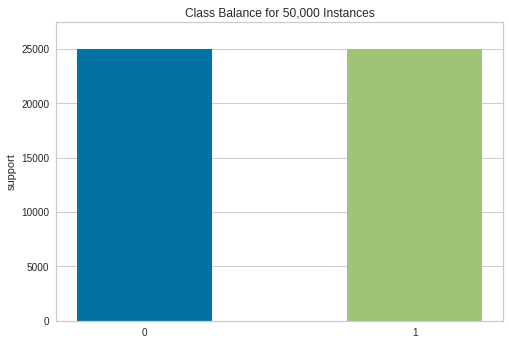

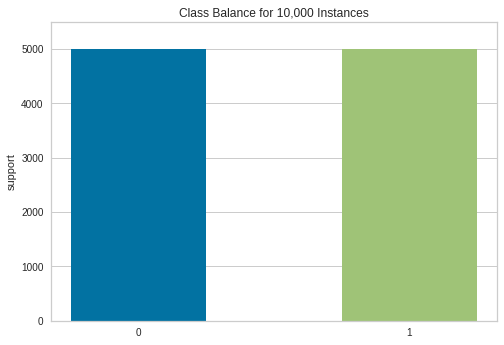

,sentiment,ttlCol
0,0,5000
1,1,5000


Cleaning text column...


100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2470.46it/s]


Removing stopwords...


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 5419.27it/s]



Encoding to TF-IDF with max_features=20
Encoding completed. Feature list:
['bad', 'br', 'even', 'film', 'first', 'get', 'good', 'great', 'it', 'like', 'movie', 'much', 'one', 'really', 'see', 'story', 'the', 'time', 'well', 'would']

Completed train/test split (train_size = 0.8):
---> Original data size: 10000
---> Training data size: 8000
---> Testing data size: 2000
---> Stratified on column: sentiment

Processing data package has been completed

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (10000, 22)
Process:
---> isProcessed: True
---> isCleaned: True
---> isStopWorded: True
---> isBalanced: True
---> isEncoded: True
---> isTrainTestSplit: True
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: True
---> isTestDataLoaded: True



-------------------------------------------------------
Processing experiment: [0] XGB depth

<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

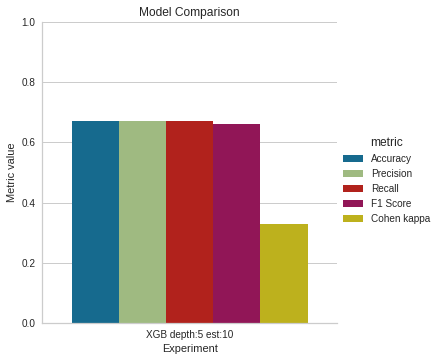

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:10      0.67       0.67    0.67      0.66         0.33

[learning_curve] Training set sizes: [ 640 1280 3200 6400]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:   46.2s remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:   51.9s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:   54.5s remaining:   18.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished




-------------------------------------------------------
Processing experiment: [1] RF depth:10 est:10
Training model for RF depth:10 est:10
Predicting model for RF depth:10 est:10
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

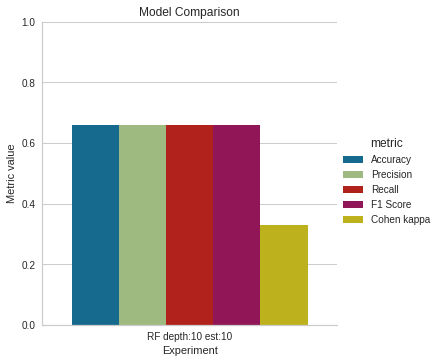

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  RF depth:10 est:10      0.66       0.66    0.66      0.66         0.33

[learning_curve] Training set sizes: [ 640 1280 3200 6400]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.4s remaining:    0.1s




-------------------------------------------------------
Processing experiment: [2] XGB depth:2 est:20
Training model for XGB depth:2 est:20
Predicting model for XGB depth:2 est:20
Model Stats:


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.8s finished


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

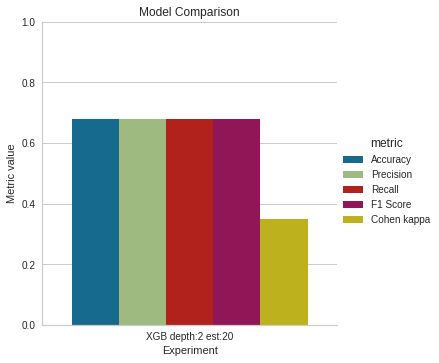

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:2 est:20      0.68       0.68    0.68      0.68         0.35

[learning_curve] Training set sizes: [ 640 1280 3200 6400]


[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:   36.3s remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:   37.6s remaining:   45.9s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:   38.7s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   48.3s finished




-------------------------------------------------------
Processing experiment: [3] RF depth:2 est:5
Training model for RF depth:2 est:5
Predicting model for RF depth:2 est:5
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

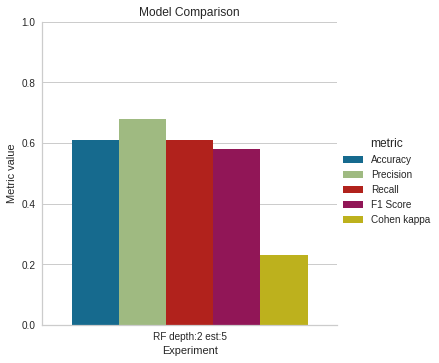

         Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  RF depth:2 est:5      0.61       0.68    0.61      0.58         0.23

[learning_curve] Training set sizes: [ 640 1280 3200 6400]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.4s remaining:    0.1s




Processing experiments complete.


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.7s finished


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

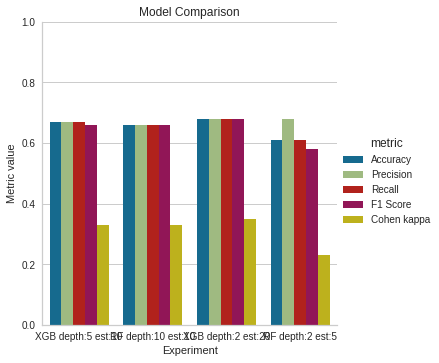

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:10      0.67       0.67    0.67      0.66         0.33
1  RF depth:10 est:10      0.66       0.66    0.66      0.66         0.33
2  XGB depth:2 est:20      0.68       0.68    0.68      0.68         0.35
3    RF depth:2 est:5      0.61       0.68    0.61      0.58         0.23


<Figure size 576x396 with 0 Axes>

In [15]:
axis_labels = [0,1] #This won't be needed once the label encoder has been included
myEM.run_experiment(axis_labels=axis_labels,
                    n_jobs=-1,  # -1 means use all available processors, otherwise include number
                    index=None) # index=None means process all experiements, 
                                # otherwise provide index of single experiment to run

# Experiment Summary

Displaying summary for experiment: XGB depth:5 est:10
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

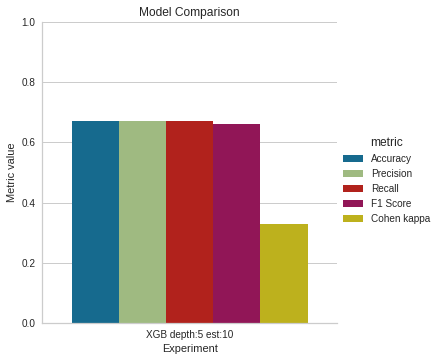

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:10      0.67       0.67    0.67      0.66         0.33

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      1000
           1       0.65      0.72      0.68      1000

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.66      2000
weighted avg       0.67      0.67      0.66      2000



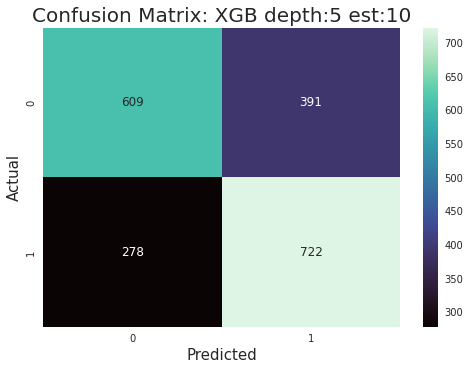

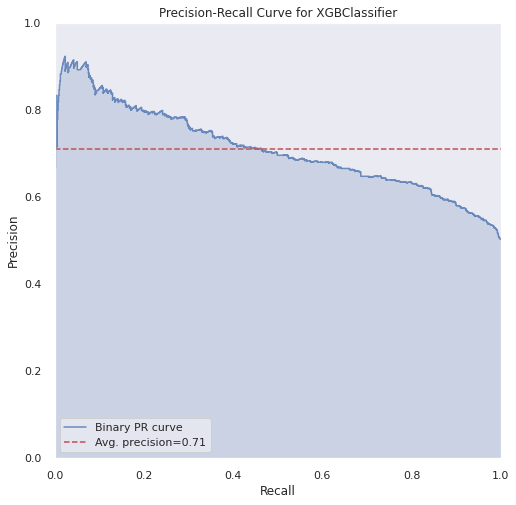

<Figure size 576x576 with 0 Axes>

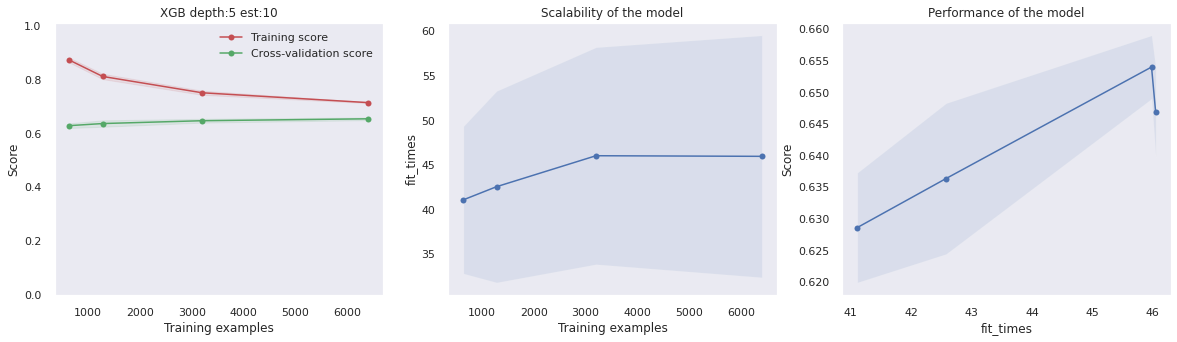

Model ROCAUC not calculated. Starting now


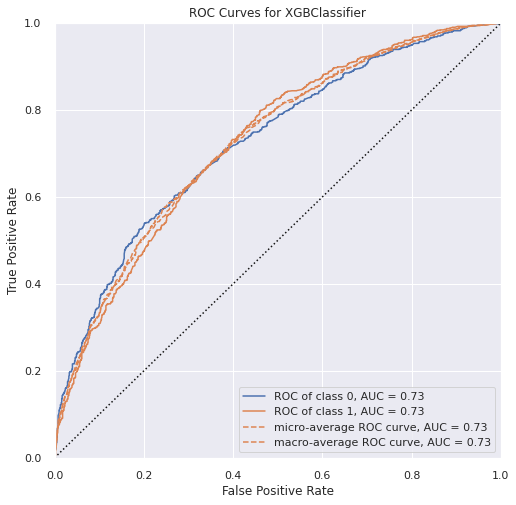

  0%|          | 0/101 [00:00<?, ?it/s]

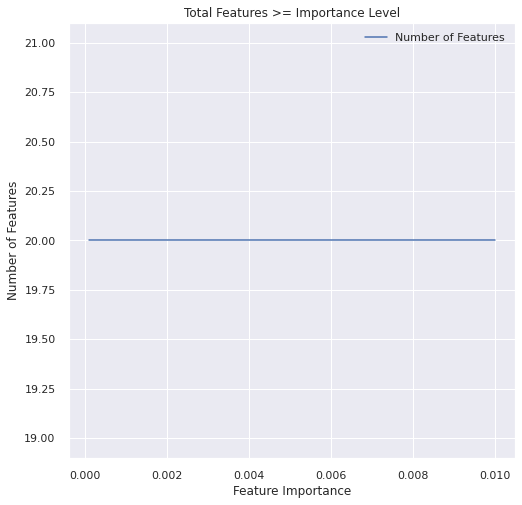

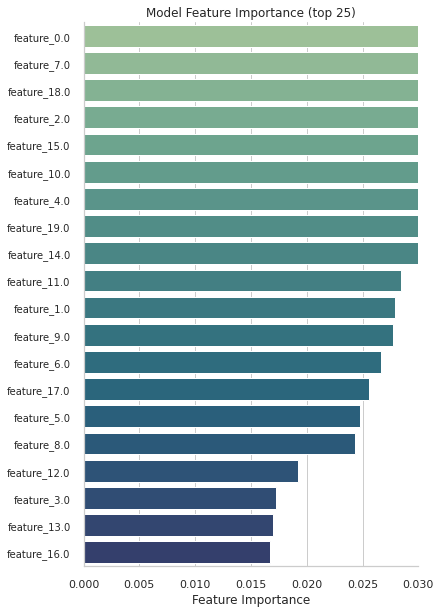

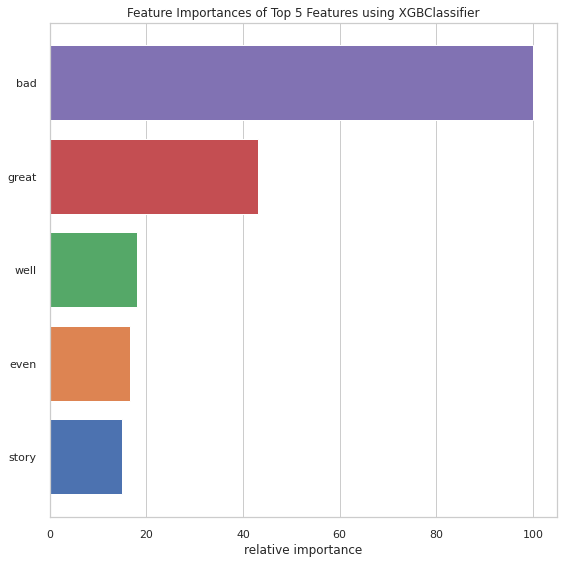

<Figure size 576x576 with 0 Axes>

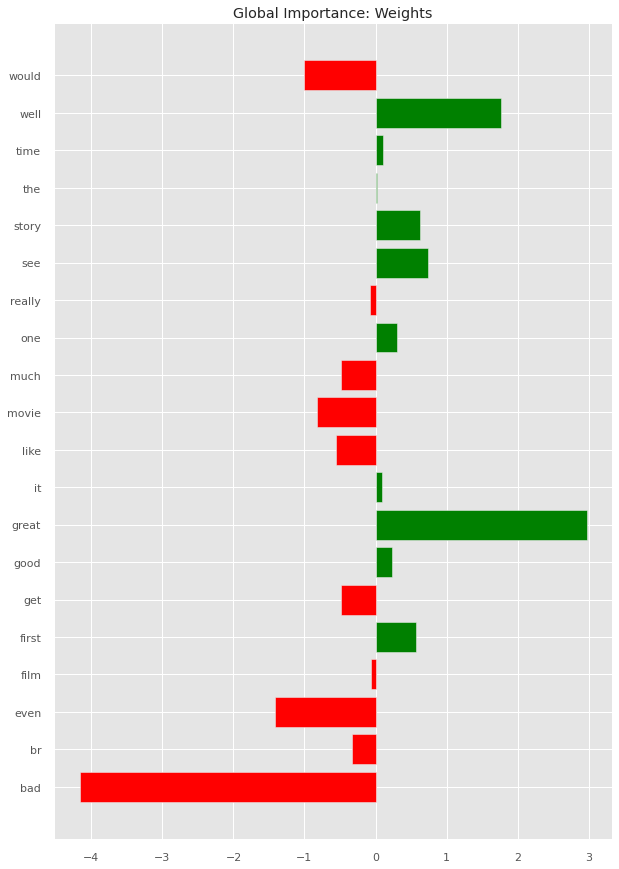

predicted [0]
actual 1


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


<Figure size 576x576 with 0 Axes>

In [16]:
myEM.display_experiment_summary(index=0, axisLabels=axis_labels)

In [17]:
#myEM.display_experiment_summary(index=1, axisLabels=axis_labels)

# SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:5 est:10


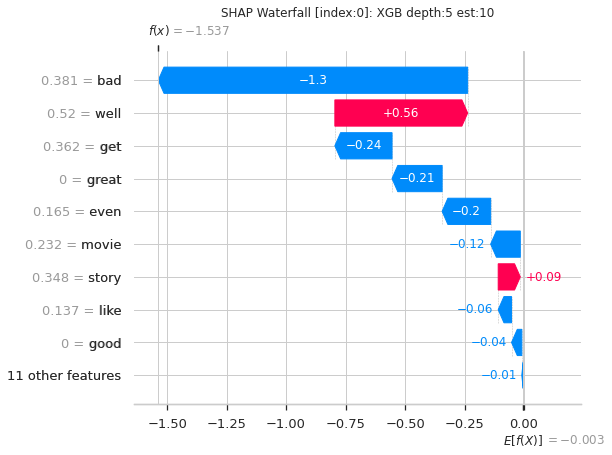

<Figure size 576x576 with 0 Axes>

In [18]:
myEM.show_shap_waterfall(model_index=0,
                         value_index=0)

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:2 est:20


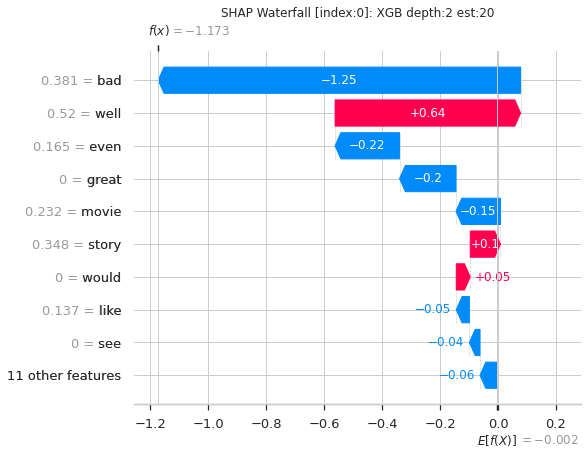

<Figure size 576x576 with 0 Axes>

In [19]:
myEM.show_shap_waterfall(model_index=2,
                         value_index=0)

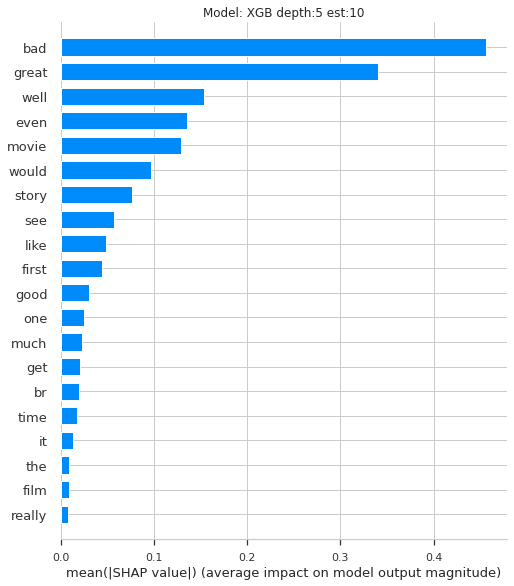

<Figure size 576x576 with 0 Axes>

In [20]:
myEM.show_shap_summary(model_index=0)

# Persistence - Experiment Manager

In [21]:
filename_EM = f'{os.getcwd()}/testExperimentManager'
myEM.save(filename_EM)

Saving file as /home/magni/ML_Root/project_root/ML1030/testExperimentManager


In [22]:
recoveredEM = ExperimentManager.load(filename_EM)

In [23]:
recoveredEM.display()

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (10000, 22)
Process:
---> isProcessed: True
---> isCleaned: True
---> isStopWorded: True
---> isBalanced: True
---> isEncoded: True
---> isTrainTestSplit: True
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: True
---> isTestDataLoaded: True

DataExperiment summary:
---> projectName: ML1030 Project Pipeline
---> experimentName: XGB depth:5 est:10
---> isDataPackageLoaded: True
---> isProcessed: True
---> isModelLoaded: True
---> isModelPredicted: True
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction

# Scratchpad